# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"

study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(study_results, mouse_metadata, on= 'Mouse ID')

# Display the data table for preview

combined_data.head()

folder_path = r'C:\Users\Joseph Haas\Desktop\matplotlib-challenge\Pymaceuticals\data'

csv_filename = os.path.join(folder_path,'combined_data.csv')

combined_data.to_csv(csv_filename, index=False)

In [2]:
# Checking the number of mice.

combined_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

for i,x in enumerate(combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])):
   
    if x==True:
       
        print(combined_data.iloc[i,0])

g989
g989
g989
g989
g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dupe = 'g989'

cleaned_df = combined_data.loc[combined_data['Mouse ID'] == dupe]


cleaned_df.head(13)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean = (combined_data['Mouse ID'] =='g989') & combined_data.duplicated(subset='Timepoint')

filtered = combined_data[~clean]

filtered

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.

filtered['Mouse ID'].nunique()



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.

mean = filtered.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median = filtered.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

var = filtered.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

standard = filtered.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

standard_error = filtered.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


filtered_df = pd.DataFrame({'Mean Tumor Volume' : (mean),
                            'Median Tumor Volume' : (median),
                            'Tumor Volume Variance' : (var),
                            'Tumor Volume Std. Dev.' : (standard),
                            'Tumor Volume SEM' :(standard_error)})




filtered_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,

# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stat = filtered.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

summary_stat


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

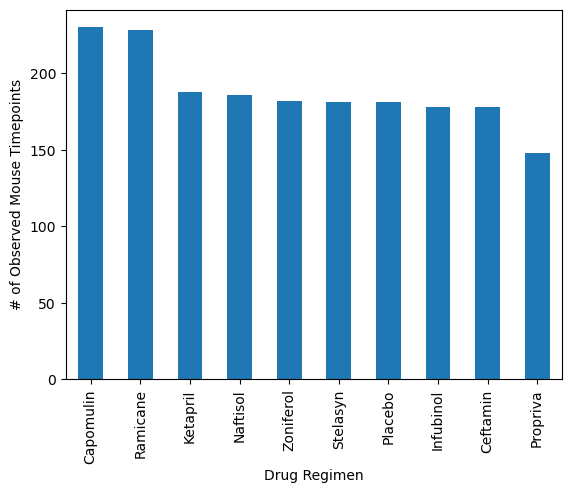

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

new_df = filtered[['Drug Regimen','Mouse ID']]

count_by_regimen = new_df['Drug Regimen'].value_counts()

count_by_regimen.plot(kind='bar',ylabel='# of Observed Mouse Timepoints')


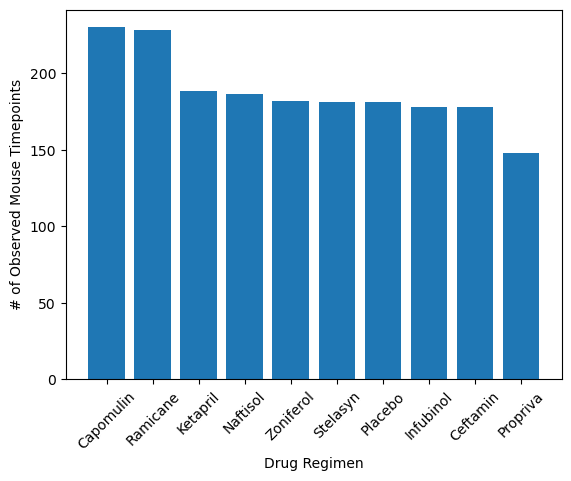

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create X and Y axis with the data required

drug_regimen = count_by_regimen.index

counts = count_by_regimen.values

# Plot Data using pyplot

plt.bar(drug_regimen,counts)

plt.xticks(rotation=45)

plt.xlabel('Drug Regimen')

plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


Text(0, 0.5, 'Sex')

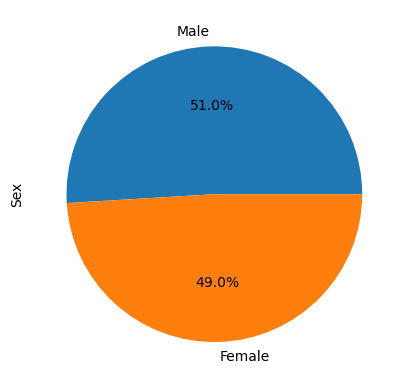

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = filtered['Sex'].value_counts()

sex_df.plot(kind='pie',autopct='%1.1f%%') 

plt.ylabel('Sex')

Text(0.5, 0, 'Female')

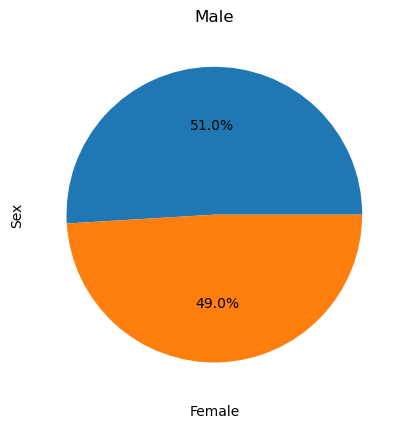

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_df, autopct='%1.1f%%')

plt.title('Male')

plt.ylabel('Sex')

plt.xlabel('Female')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


final_df = filtered.groupby(['Mouse ID'])['Timepoint'].max()

final_volume_df = pd.DataFrame(final_df)

final_tumor_df = pd.merge(filtered, final_volume_df, on=('Mouse ID', 'Timepoint'), how='right')

final_tumor_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset 
  
# Determine outliers using upper and lower bounds

capo_med = []

remi_med = []

infu_med = []

ceft_med = []

for index, row in final_tumor_df.iterrows():

    if row ['Drug Regimen'] == 'Capomulin':
        capo_med.append(row['Tumor Volume (mm3)'])
    if row ['Drug Regimen'] == 'Ramicane':
        remi_med.append(row['Tumor Volume (mm3)'])
    if row ['Drug Regimen'] == 'Infubinol':
        infu_med.append(row['Tumor Volume (mm3)'])
    if row ['Drug Regimen'] == 'Ceftamin':
        ceft_med.append(row['Tumor Volume (mm3)'])

treatment_df = pd.DataFrame({treatments[0] : capo_med,
treatments[1] : remi_med,
treatments[2] : infu_med,
treatments[3] : ceft_med})

treatment_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = treatment_df.quantile([0.25, 0.5, 0.75])

# Select the rows corresponding to the quartiles

lowerq = quartiles.loc[0.25]

upperq = quartiles.loc[0.75]

# Calculate the IQR for each treatment

iqr = upperq - lowerq

print(f'IQR for {treatments}:')

print(iqr)

# Determine potential outliers for each treatment

lower_bound = lowerq - 1.5 * iqr

upper_bound = upperq + 1.5 * iqr

print(f'lower bound for {treatments}:')

print(lower_bound)

print(f'upper bound for {treatments}:')

print(upper_bound)
   
print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")




IQR for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
Capomulin     7.781863
Ramicane      9.098537
Infubinol    11.477135
Ceftamin     15.577752
dtype: float64
lower bound for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
Capomulin    20.704562
Ramicane     17.912664
Infubinol    36.832905
Ceftamin     25.355450
dtype: float64
upper bound for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
Capomulin    51.832015
Ramicane     54.306811
Infubinol    82.741446
Ceftamin     87.666458
dtype: float64
Values below Capomulin    20.704562
Ramicane     17.912664
Infubinol    36.832905
Ceftamin     25.355450
dtype: float64 could be outliers.
Values above Capomulin    51.832015
Ramicane     54.306811
Infubinol    82.741446
Ceftamin     87.666458
dtype: float64 could be outliers.


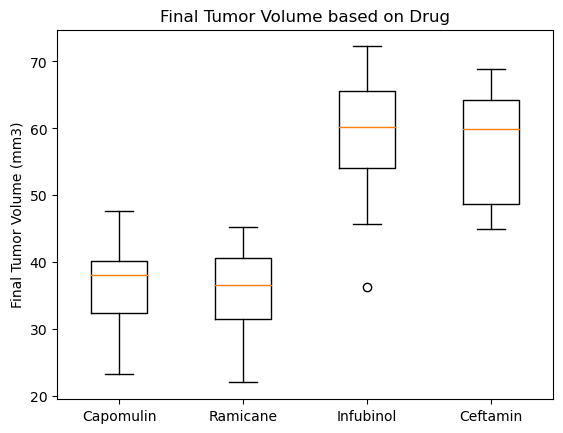

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(treatment_df)

plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.ylabel('Final Tumor Volume (mm3)')

plt.title('Final Tumor Volume based on Drug')

plt.show()

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse B128'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

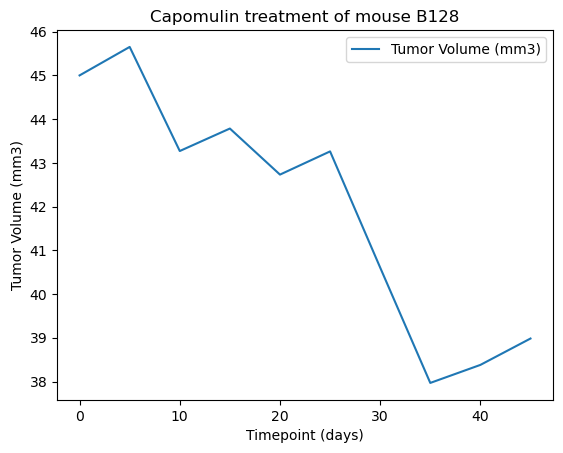

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

single_mouse = filtered[filtered['Mouse ID'] == 'b128']

single_mouse.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', xlabel='Timepoint (days)', ylabel= 'Tumor Volume (mm3)', title= 'Capomulin treatment of mouse B128')




<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

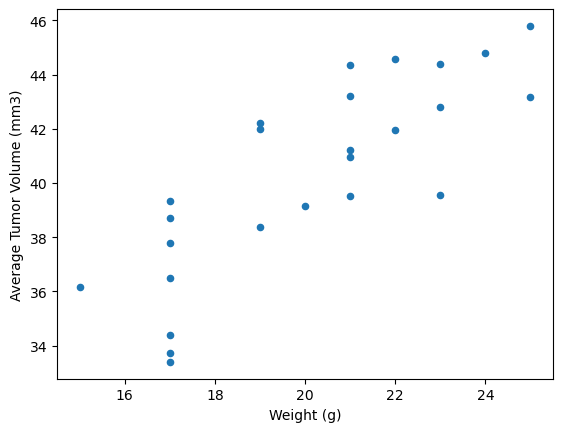

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capo_reg = filtered[filtered['Drug Regimen'] == 'Capomulin']

capo_reg = capo_reg.drop_duplicates(subset=['Weight (g)', 'Tumor Volume (mm3)'])

capo_reg.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean().plot(kind='scatter',x= 'Weight (g)', y= 'Tumor Volume (mm3)', xlabel= 'Weight (g)', ylabel= 'Average Tumor Volume (mm3)' )


## Correlation and Regression

The correlation between weight and average tumor volume is 0.56.


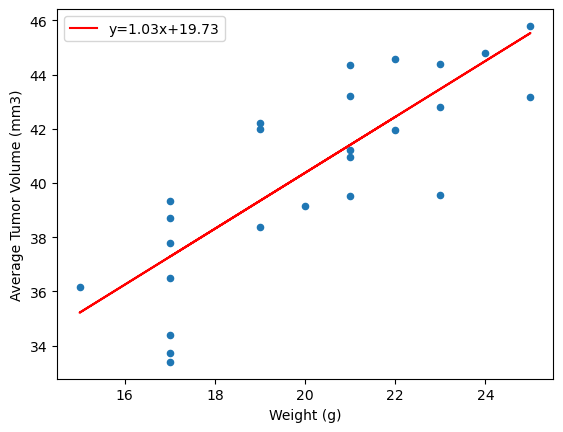

In [36]:
# Calculate the correlation coefficient and a linear regression model 

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x= capo_reg['Weight (g)']

y= capo_reg['Tumor Volume (mm3)']

correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume is {round(correlation[0],2)}.""")

model=st.linregress(capo_reg['Weight (g)'],capo_reg['Tumor Volume (mm3)'])

model

intercept= 19.734464583575427

slope= 1.032104103285347

rvalue=0.5627563247877113

line = slope*(capo_reg['Weight (g)'])+intercept

capo_reg.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean().plot(kind='scatter', x= 'Weight (g)', y= 'Tumor Volume (mm3)', xlabel= 'Weight (g)', ylabel= 'Average Tumor Volume (mm3)')

plt.plot(capo_reg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.legend()
